In [ ]:
!pip install dash flask-ngrok plotly

In [ ]:
!pip install dash
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [ ]:
!ngrok authtoken 2pxNnRANjbu5nsWsipPm9XMUNww_3EhTiWdw9R6LwYPj7C4Kv

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Importing the essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score
import plotly.express as px
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
import torch
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from dash import Dash, dcc, html, Input, Output
from flask import Flask
from pyngrok import ngrok
from transformers import pipeline

In [ ]:
# 1. Load the datasets
reviews_path = 'credit_card_reviews_28.csv'
credit_data_path = 'credit-data-test.csv'

In [ ]:
reviews_df = pd.read_csv(reviews_path)
credit_data_df = pd.read_csv(credit_data_path, encoding='latin1')

In [ ]:
# 2. Data Cleaning
# Clean credit_data
credit_data_df = credit_data_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
credit_data_df.dropna(subset=['Card Name'], inplace=True)

In [ ]:
# Clean reviews
reviews_df['review'] = reviews_df['review'].str.lower().str.replace('[^\w\s]', '')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


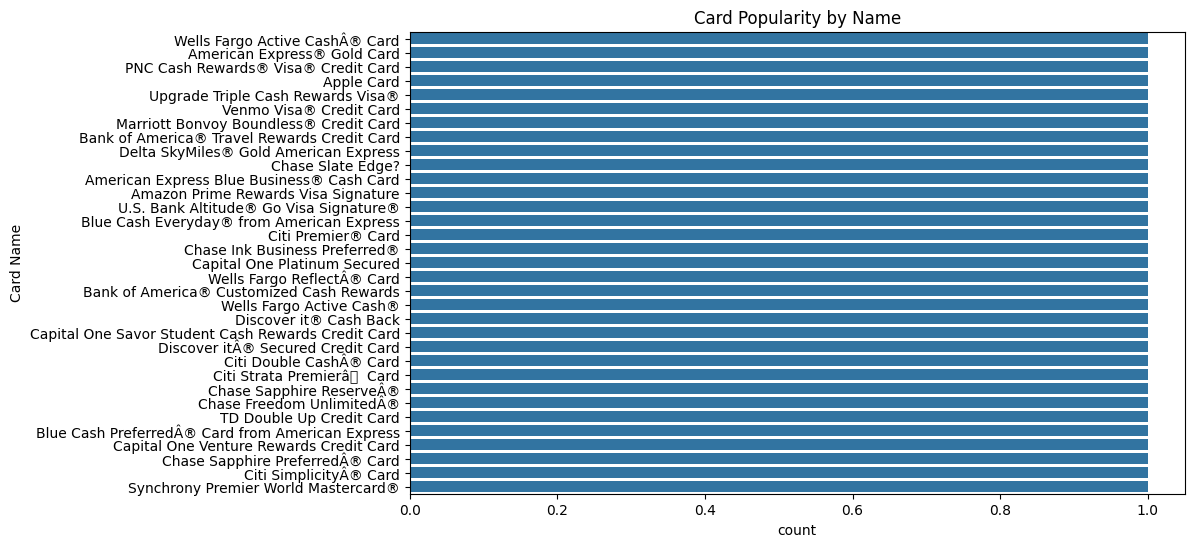

In [ ]:
# 3. EDA
# Visualize key metrics
plt.figure(figsize=(10, 6))
sns.countplot(y='Card Name', data=credit_data_df, order=credit_data_df['Card Name'].value_counts().index)
plt.title('Card Popularity by Name')
plt.show()

In [ ]:
# 4. Feature Engineering for ML
# Sentiment analysis model
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews_df['review'])
y = [1 if 'good' in review else 0 for review in reviews_df['review']]

In [ ]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Logistic Regression for sentiment analysis
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
# Evaluate
print("Sentiment Analysis Performance")
print(classification_report(y_test, preds))

Sentiment Analysis Performance
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        59
           1       1.00      0.72      0.84        29

    accuracy                           0.91        88
   macro avg       0.94      0.86      0.89        88
weighted avg       0.92      0.91      0.90        88



In [ ]:
# Drop rows with NaN values in 'Annual Fee' and 'Rewards Rate'
features_cleaned = features.dropna()

# Recheck for NaN values
print(features_cleaned.isnull().sum())

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
credit_data_df.loc[features_cleaned.index, 'Cluster'] = kmeans.fit_predict(features_cleaned)

# Visualize the clusters
fig = px.scatter(credit_data_df, x='Annual Fee', y='Rewards Rate', color='Cluster',
                 hover_data=['Card Name'], title='Credit Card Clustering')
fig.show()

Annual Fee      0
Rewards Rate    0
dtype: int64


In [ ]:
# Perform clustering with cleaned features
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit and predict clusters
clusters = kmeans.fit_predict(features_cleaned)

# Assign cluster labels back to the original DataFrame
credit_data_df.loc[features_cleaned.index, 'Cluster'] = clusters

# Visualize the clusters
fig = px.scatter(
    credit_data_df,
    x='Annual Fee',
    y='Rewards Rate',
    color='Cluster',
    hover_data=['Card Name'],
    title='Credit Card Clustering'
)
fig.show()

In [ ]:
# 1. Merge the datasets
credit_data_df['Card Name'] = credit_data_df['Card Name'].str.lower().str.strip()
reviews_df['card_name'] = reviews_df['card_name'].str.lower().str.strip()

# Merge on card name
merged_df = pd.merge(
    reviews_df,
    credit_data_df,
    left_on='card_name',
    right_on='Card Name',
    how='inner'
)

In [ ]:
# Check merged data
print(merged_df.head())

Empty DataFrame
Columns: [card_name, review, Card Name, Transfer Intro APR, Regular APR, Annual Fee, Rewards Rate, Bonus Offer, Accepted Credit, Cluster]
Index: []


In [ ]:
print("Unique card names in reviews dataset:")
print(reviews_df['card_name'].unique())

print("\nUnique card names in credit data dataset:")
print(credit_data_df['Card Name'].unique())

Unique card names in reviews dataset:
['blue cash preferred annual fee' 'chase freedom unlimited annual fee'
 'delta reserve credit card annual fee'
 'chase sapphire reserve annual fee'
 'discover it secured credit card minimum security deposit'
 'citi double cash card annual fee'
 'capital one quicksilverone annual fee' 'petal 2 card annual fee'
 'wells fargo active cash annual fee' 'wells fargo reflect annual fee'
 'citi simplicity card annual fee' 'capital one venture annual fee'
 'discover it cash back annual fee'
 'capital one platinum secured minimum security deposit'
 'amex gold card annual fee' 'chase ink preferred annual fee'
 'amex blue cash everyday annual fee' 'u.s. bank altitude go annual fee'
 'annual fee' 'synchrony premier annual fee' 'delta gold card annual fee'
 'marriott bonvoy boundless annual fee']

Unique card names in credit data dataset:
['wells fargo active cashâ® card' 'wells fargo reflectâ® card'
 'citi simplicityâ® card' 'chase sapphire preferredâ® card'
 'c

In [ ]:
def normalize_card_name(name):
    if isinstance(name, str):
        name = re.sub(r'[^a-zA-Z0-9\s]', '', name)  # Remove special characters
        name = re.sub(r'\b(annual fee|min security deposit)\b', '', name, flags=re.IGNORECASE)  # Remove terms
        return name.strip().lower()
    return name

# Normalize card names in both datasets
reviews_df['normalized_card_name'] = reviews_df['card_name'].apply(normalize_card_name)
credit_data_df['normalized_card_name'] = credit_data_df['Card Name'].apply(normalize_card_name)

In [ ]:
# Check for overlap
common_card_names = set(reviews_df['normalized_card_name']).intersection(set(credit_data_df['normalized_card_name']))
print(f"Number of overlapping card names: {len(common_card_names)}")
print(f"Overlapping card names: {common_card_names}")

Number of overlapping card names: 6
Overlapping card names: {'citi double cash card', 'discover it cash back', 'chase sapphire reserve', 'chase freedom unlimited', 'wells fargo active cash', 'citi simplicity card'}


In [ ]:
# Merge datasets based on normalized card names
merged_df = pd.merge(
    reviews_df,
    credit_data_df,
    left_on='normalized_card_name',
    right_on='normalized_card_name',
    how='inner'
)

# Check merged dataset
print(f"Merged dataset contains {merged_df.shape[0]} rows.")
print(merged_df.head())

Merged dataset contains 92 rows.
                            card_name  \
0  chase freedom unlimited annual fee   
1  chase freedom unlimited annual fee   
2  chase freedom unlimited annual fee   
3  chase freedom unlimited annual fee   
4  chase freedom unlimited annual fee   

                                              review     normalized_card_name  \
0  chase freedom unlimited is a very good credit ...  chase freedom unlimited   
1  they don't honor their promotions and engage i...  chase freedom unlimited   
2  signed up for the card with a sales promotion:...  chase freedom unlimited   
3  chase freedom is not too bad, but the customer...  chase freedom unlimited   
4  i have had this card for many years and have b...  chase freedom unlimited   

                 Card Name     Transfer Intro APR          Regular APR  \
0  chase freedom unlimited  Double Up Credit Card  19.99% - 28.74% (V)   
1  chase freedom unlimited  Double Up Credit Card  19.99% - 28.74% (V)   
2  chase fr

In [ ]:
# Filter merged dataset
focused_merged_df = merged_df.copy()

In [ ]:
# Sentiment Analysis (e.g., Positive or Negative Reviews)
focused_merged_df['sentiment'] = focused_merged_df['review'].apply(
    lambda x: 'positive' if 'good' in x or 'great' in x else 'negative'
)

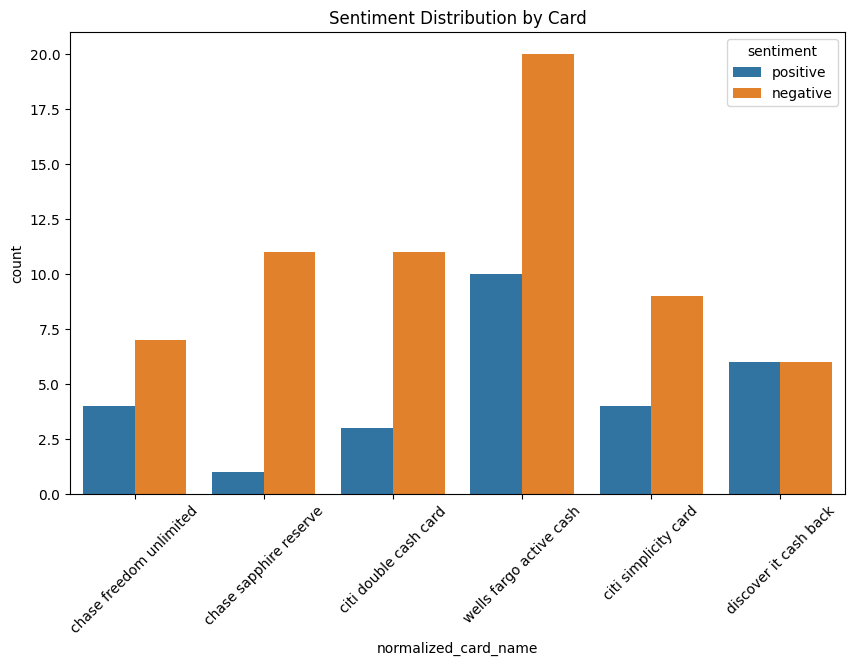

In [ ]:
# Plot sentiment distribution by card
plt.figure(figsize=(10, 6))
sns.countplot(data=focused_merged_df, x='normalized_card_name', hue='sentiment')
plt.title('Sentiment Distribution by Card')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create text-based features
focused_merged_df['text_features'] = focused_merged_df['Rewards Rate'].astype(str) + " " + focused_merged_df['Annual Fee'].astype(str)

In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(focused_merged_df['text_features'])

In [ ]:
# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Recommend cards based on similarity
def recommend_card(card_name):
    idx = focused_merged_df[focused_merged_df['normalized_card_name'] == card_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:4]  # Top 3 recommendations
    card_indices = [i[0] for i in sim_scores]
    return focused_merged_df.iloc[card_indices][['normalized_card_name', 'Card Name']]

# Example Recommendation
print("Recommendations for 'citi simplicity card':")
print(recommend_card('citi simplicity card'))

Recommendations for 'citi simplicity card':
    normalized_card_name             Card Name
53  citi simplicity card  citi simplicity card
54  citi simplicity card  citi simplicity card
55  citi simplicity card  citi simplicity card


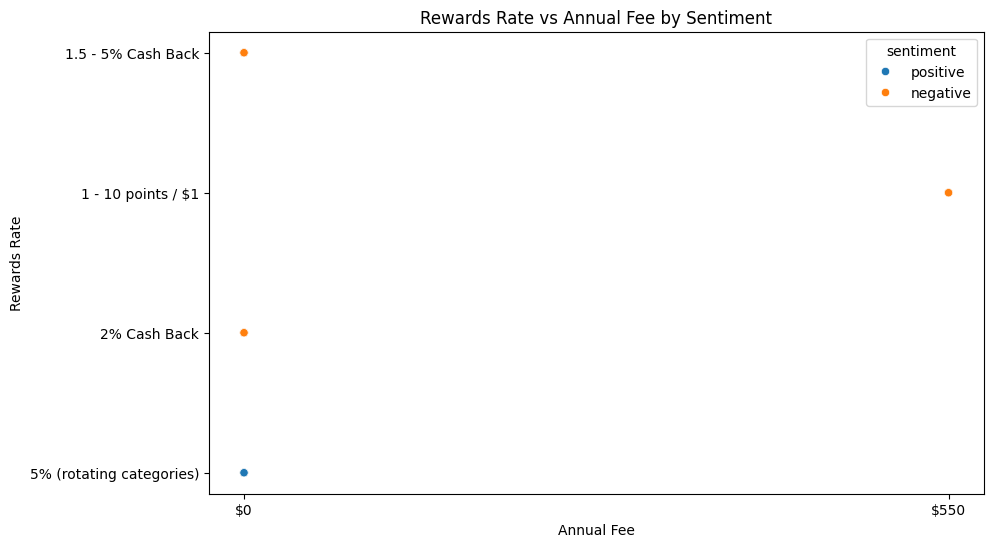

In [ ]:
# Visualize card features: Rewards Rate vs Annual Fee
plt.figure(figsize=(10, 6))
sns.scatterplot(data=focused_merged_df, x='Annual Fee', y='Rewards Rate', hue='sentiment')
plt.title('Rewards Rate vs Annual Fee by Sentiment')
plt.show()

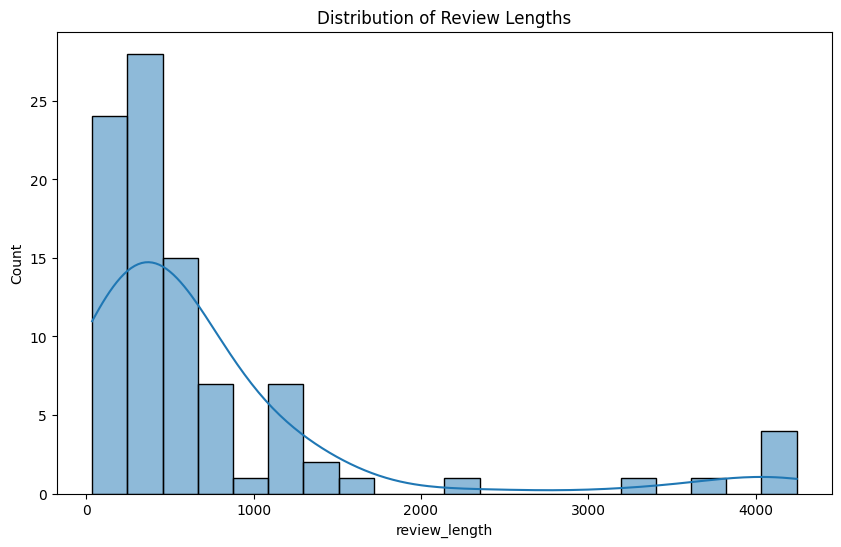

In [ ]:
# Distribution of Review Lengths
focused_merged_df['review_length'] = focused_merged_df['review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(focused_merged_df['review_length'], bins=20, kde=True)
plt.title('Distribution of Review Lengths')
plt.show()

In [ ]:
# Preprocess the data for BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def tokenize_data(data):
    return tokenizer(data['review'].tolist(), padding=True, truncation=True, return_tensors="pt")

train_data, test_data = train_test_split(focused_merged_df, test_size=0.2, random_state=42)
train_tokens = tokenize_data(train_data)
test_tokens = tokenize_data(test_data)

In [ ]:
# Define the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs'
)

In [ ]:
class ReviewDataset(Dataset):
    def __init__(self, reviews, labels, tokenizer, max_length=128):
        self.reviews = reviews
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.reviews[idx]
        label = self.labels[idx]

        tokens = self.tokenizer(
            review,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )

        return {
            'input_ids': tokens['input_ids'].squeeze(0),
            'attention_mask': tokens['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [ ]:
# Prepare data
focused_merged_df['sentiment_label'] = focused_merged_df['sentiment'].map({'positive': 1, 'negative': 0})
train_data, test_data = train_test_split(focused_merged_df, test_size=0.2, random_state=42)

train_dataset = ReviewDataset(
    reviews=train_data['review'].tolist(),
    labels=train_data['sentiment_label'].tolist(),
    tokenizer=tokenizer
)

test_dataset = ReviewDataset(
    reviews=test_data['review'].tolist(),
    labels=test_data['sentiment_label'].tolist(),
    tokenizer=tokenizer
)

In [ ]:
# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
# Define model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Optimizer and Loss
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

Epoch 1/10, Loss: 0.2433
Epoch 2/10, Loss: 0.1174
Epoch 3/10, Loss: 0.1180
Epoch 4/10, Loss: 0.0919
Epoch 5/10, Loss: 0.0206
Epoch 6/10, Loss: 0.0399
Epoch 7/10, Loss: 0.0075
Epoch 8/10, Loss: 0.0045
Epoch 9/10, Loss: 0.0050
Epoch 10/10, Loss: 0.0057


In [ ]:
# Evaluate
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        labels = batch['label'].cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(labels)

accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6842


In [ ]:
# Prepare data
X = focused_merged_df['review']
y = focused_merged_df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Oversample minority class
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

In [ ]:
# Train Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.33      0.67      0.44         3

    accuracy                           0.74        19
   macro avg       0.63      0.71      0.64        19
weighted avg       0.83      0.74      0.77        19



In [ ]:
# Random Forest with class weights
rf_model = RandomForestClassifier(class_weight={0: 1, 1: 2}, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred = rf_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.67      0.80         3

    accuracy                           0.95        19
   macro avg       0.97      0.83      0.88        19
weighted avg       0.95      0.95      0.94        19



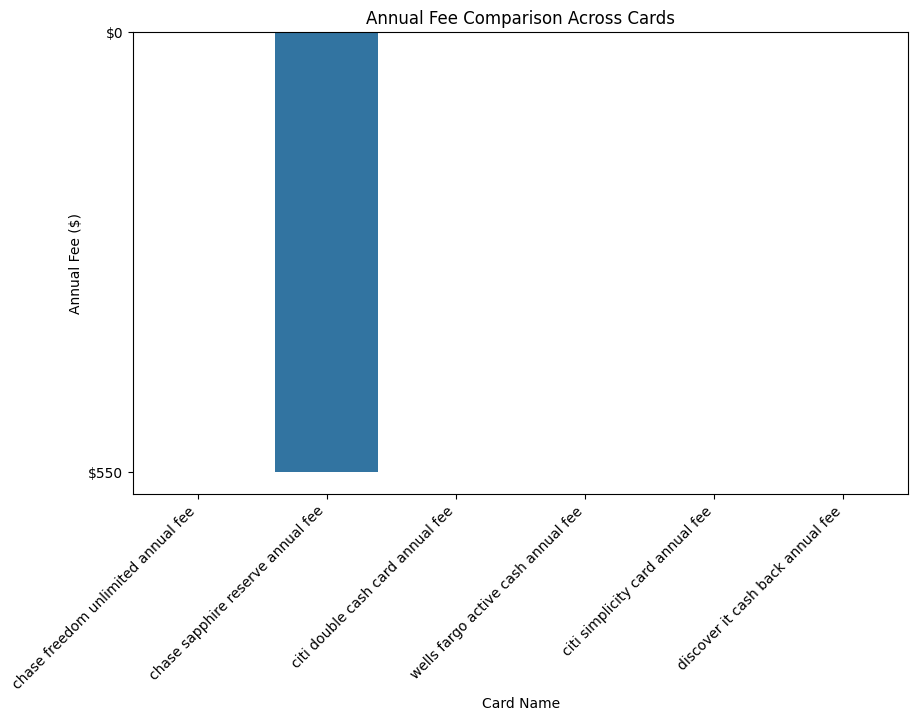

In [ ]:
# 1. Feature Comparison: Annual Fee
plt.figure(figsize=(10, 6))
sns.barplot(x='card_name', y='Annual Fee', data=merged_df)
plt.title('Annual Fee Comparison Across Cards')
plt.xlabel('Card Name')
plt.ylabel('Annual Fee ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

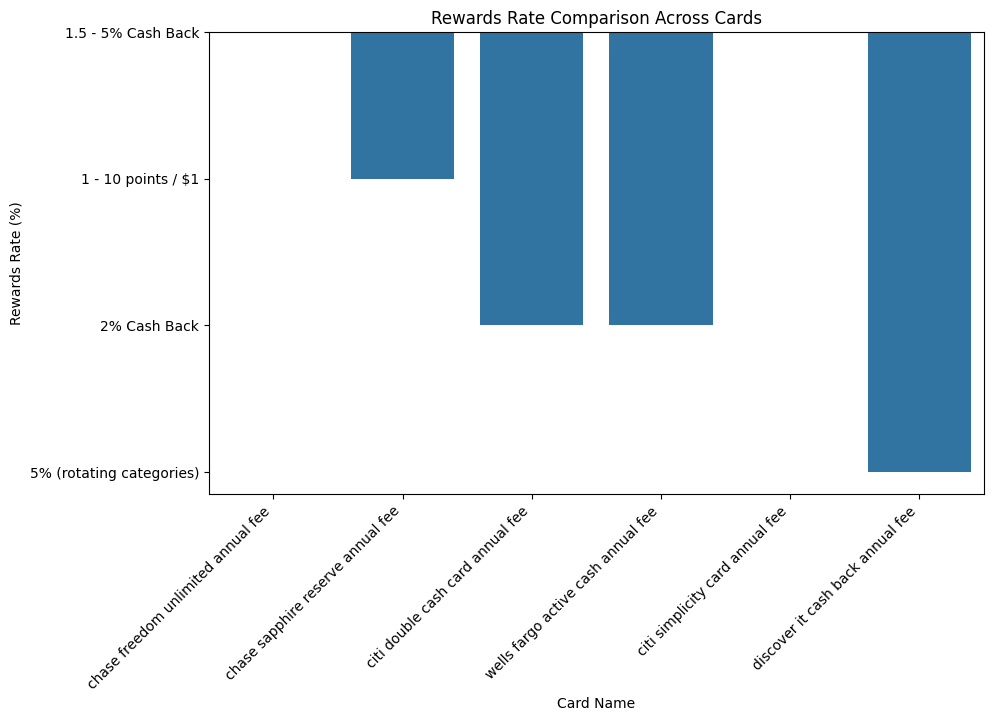

In [ ]:
# 2. Feature Comparison: Rewards Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='card_name', y='Rewards Rate', data=merged_df)
plt.title('Rewards Rate Comparison Across Cards')
plt.xlabel('Card Name')
plt.ylabel('Rewards Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()